In [33]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

## Load weights and transforms object

In [ ]:
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
transforms = weights.transforms()
transforms

ObjectDetection()

In [ ]:
classes = weights.meta['categories']
len(classes)

91

In [24]:
classes

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

## Load the pretrained model

```
model = FasterRCNN(
    backbone,
    num_classes=num_classes,
    min_size=800,
    max_size=1333,
    image_mean=[0.485, 0.456, 0.406],
    image_std=[0.229, 0.224, 0.225],
    rpn_anchor_generator=anchor_generator,
    rpn_head=None,
    rpn_pre_nms_top_n_train=2000,
    rpn_pre_nms_top_n_test=1000,
    rpn_post_nms_top_n_train=2000,
    rpn_post_nms_top_n_test=1000,
    rpn_nms_thresh=0.7,
    rpn_fg_iou_thresh=0.7,
    rpn_bg_iou_thresh=0.3,
    rpn_batch_size_per_image=256,
    rpn_positive_fraction=0.5,
    box_roi_pool=None,
    box_head=None,
    box_predictor=None,
    box_score_thresh=0.8,  # This is the confidence threshold
    box_nms_thresh=0.5,    # This is the NMS threshold for detections
    box_detections_per_img=100, # Max detections per image
    box_fg_iou_thresh=0.5,
    box_bg_iou_thresh=0.5,
    box_batch_size_per_image=512,
    box_positive_fraction=0.25,
    bbox_reg_weights=None
)
```

In [28]:
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.8)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [ ]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

## Inferencing the model

In [20]:
def preprocess(image_path, transforms):
  image = Image.open(image_path).convert('RGB')
  image = transforms(image).unsqueeze(0)

  return image

In [29]:
def predict(img, model):
  with torch.no_grad():
    output = model(img)

  return output[0]

In [31]:
image_path = '/content/F0437943-7C25-49D3-8BA8-86827836FB85_1_201_a-scaled.jpg'
image = preprocess(image_path, transforms)

prediction = predict(image, model)

In [32]:
prediction

{'boxes': tensor([[328.3805, 157.3257, 496.4606, 479.8518],
         [322.3715,   8.9821, 525.6819, 348.4585],
         [124.6261, 171.0663, 291.5636, 480.0000],
         [163.6183,   6.0369, 303.5876, 337.6412],
         [699.7601, 246.4025, 719.7742, 271.9082]]),
 'labels': tensor([19,  1, 19,  1,  3]),
 'scores': tensor([0.9995, 0.9994, 0.9988, 0.9985, 0.8356])}

## Visualize the image

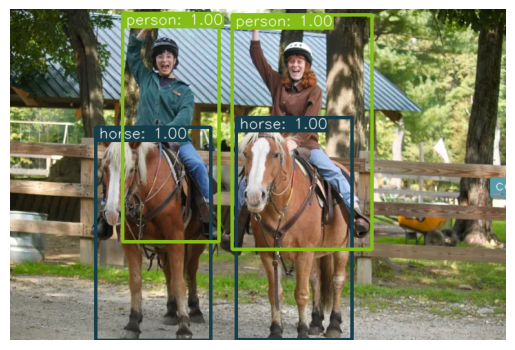

In [62]:
image_path = '/content/F0437943-7C25-49D3-8BA8-86827836FB85_1_201_a-scaled.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

labels = prediction['labels'].cpu().numpy()
boxes = prediction['boxes'].cpu().numpy().astype(np.int32)
scores = prediction['scores'].cpu().numpy()

color_item = {}

for box, label, score in zip(boxes, labels, scores):
  if label not in color_item:
    color_item[label] = (
        np.random.randint(0, 221),
        np.random.randint(0, 221),
        np.random.randint(0, 221),
    )

  # Draw bounding box
  cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), color_item[label], 4)

  # Label text
  label_text = f'{classes[label]}: {score:.2f}'

  # Get the font baseline and text size
  text_size, baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)

  # Draw text rectangle
  cv2.rectangle(image,
                (box[0], box[1] + text_size[1] + 5),
                (box[0] + text_size[0] + 5, box[1]), color_item[label], -1)

  # Put label text on the image
  cv2.putText(image, label_text,
              (box[0] + 5, box[1] + text_size[1]),
              cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1, cv2.LINE_AA)

plt.imshow(image)
plt.axis('off')
plt.show()